In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Memilih fitur yang akan dianalisis
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
            'FUELCONSUMPTION_COMB_MPG']
X = df[features]
y = df['CO2EMISSIONS']

# Membagi data training dan testing
# Membagi dataset menjadi data training dan testing dengan proporsi:
# - 80% data training (X_train, y_train)
# - 20% data testing (X_test, y_test) sesuai test_size=0.2
# random_state=42 digunakan untuk memastikan hasil pembagian data yang konsisten/reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Membuat fitur polynomial
# Membuat objek PolynomialFeatures dengan derajat 2 untuk menghasilkan fitur polinomial
# Ini akan mengubah fitur asli menjadi fitur polinomial hingga derajat 2
# Contoh: jika x adalah fitur asli, maka akan dihasilkan 1, x, x^2
poly_features = PolynomialFeatures(degree=2)

# Melakukan fit dan transform pada data training
# fit_transform() akan:
# 1. Mempelajari struktur fitur polinomial dari data training
# 2. Mengubah data training menjadi bentuk polinomial
X_train_poly = poly_features.fit_transform(X_train)

# Melakukan transform pada data testing
# Hanya transform() karena struktur polinomial sudah dipelajari dari data training
# Menggunakan struktur yang sama dengan data training untuk konsistensi
X_test_poly = poly_features.transform(X_test)


In [7]:
# Melatih model
# Membuat objek model regresi linear
# LinearRegression() adalah model regresi linear dari scikit-learn yang akan digunakan
# untuk memprediksi CO2 EMISSIONS berdasarkan fitur polinomial
poly_model = LinearRegression()

# Melatih model menggunakan data training
# fit() akan:
# 1. Mempelajari pola hubungan antara fitur polinomial (X_train_poly) 
#    dengan target (y_train/CO2 EMISSIONS)
# 2. Menghitung koefisien untuk setiap fitur polinomial
# 3. Mengoptimalkan model untuk meminimalkan error prediksi
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [8]:
# Prediksi dan evaluasi
# Melakukan prediksi CO2 EMISSIONS menggunakan model polinomial
# predict() akan:
# 1. Menggunakan model yang sudah dilatih (poly_model) untuk memprediksi CO2 EMISSIONS
# 2. Input yang digunakan adalah data testing dalam bentuk polinomial (X_test_poly)
# 3. Hasil prediksi disimpan dalam variabel y_pred untuk evaluasi performa model
y_pred = poly_model.predict(X_test_poly)

In [11]:
# Evaluasi model
print("\nMetrik Evaluasi Model:")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')




Metrik Evaluasi Model:
MAE: 10.1872
MSE: 304.1832
RMSE: 17.4408
R2 Score: 0.9264


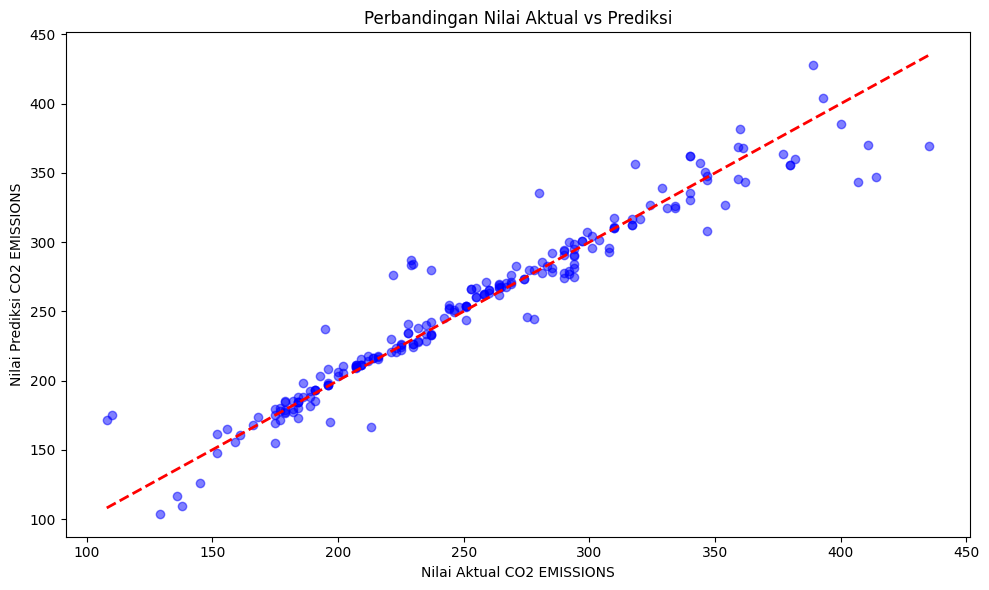

In [14]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual CO2 EMISSIONS')
plt.ylabel('Nilai Prediksi CO2 EMISSIONS')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.tight_layout()
plt.show()

